# KNN Algorithm 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

## Load Dataset

This function includes,


- Reading CSV files.
- Joining training and test datasets
- Feature extraction. (Drop 4 features)
- Label encoding on 3 features 
- Label mapping for output class

In [2]:
def load_train_dataset():
    df = pd.read_csv('Datasets/csv_result-KDDTrain+.csv')
    df_test = pd.read_csv('Datasets/csv_result-KDDTest+.csv')
    
    data_set = pd.concat([df,df_test], axis=0,sort=False)
    
    data_set.drop(['num_outbound_cmds',
          'is_host_login',
          'urgent',
          'id'], axis = 'columns' , inplace = True)
    
    data_set['protocol_type'] = LabelEncoder().fit_transform(data_set['protocol_type'])
    data_set['flag'] = LabelEncoder().fit_transform(data_set['flag'])
    data_set['service'] = LabelEncoder().fit_transform(data_set['service'])
    
    data_set['class'] = data_set['class'].map( {'normal':0, 'anomaly':1} )
    
    limit = data_set.shape[1]-1
    
    X = data_set.iloc[:,0:limit]
    Y = data_set.iloc[:,limit]
    
    return X, Y, data_set

X, Y, data_set = load_train_dataset()

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


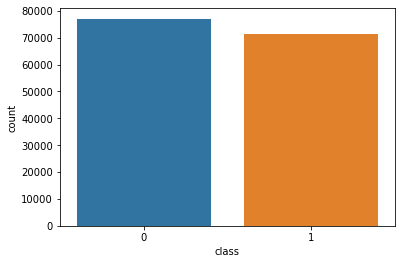

In [3]:
sns.countplot(data_set['class'])

In [4]:
data_set.groupby('class')['class'].count()

class
0    77054
1    71463
Name: class, dtype: int64

In [5]:
train_X, test_X , train_Y , test_Y = train_test_split(X, Y, test_size=0.151794,shuffle=False)

print('Training X :',train_X.shape)
print('Test_X :',test_X.shape)
print('Training_Y :',train_Y.shape)
print('Test_Y :',test_Y.shape)

Training X : (125973, 38)
Test_X : (22544, 38)
Training_Y : (125973,)
Test_Y : (22544,)


In [6]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [7]:
train_X, val_X , train_Y , val_Y = train_test_split(train_X,train_Y, test_size=0.065,shuffle=False)

print('Training X   :',train_X.shape)
print('Validation X :',val_X.shape)
print('Test_X       :',test_X.shape)
print('Training_Y   :',train_Y.shape)
print('Validation Y :',val_Y.shape)
print('Test_Y       :',test_Y.shape)

Training X   : (117784, 38)
Validation X : (8189, 38)
Test_X       : (22544, 38)
Training_Y   : (117784,)
Validation Y : (8189,)
Test_Y       : (22544,)


In [8]:
knn_classifier = KNeighborsClassifier(n_neighbors = 6, p = 1, weights ='distance').fit(train_X,train_Y)

In [9]:
test_predictions = knn_classifier.predict(test_X)

print("Train set accuracy           : {:.6f} %".format(knn_classifier.score(train_X,train_Y)*100))
print("Cross-Validation set accuracy: {:.6f} %".format(knn_classifier.score(val_X,val_Y)*100))
print("Test set accuracy            : {:.6f} %".format(knn_classifier.score(test_X, test_Y)*100))

Train set accuracy           : 99.994906 %
Cross-Validation set accuracy: 99.743558 %
Test set accuracy            : 76.876331 %


In [12]:
def plot_cm(labels, predictions, p=0.81):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.text(0.3,2.6,'True Negatives  : '+ str(cm[0][0]),size=14)
    plt.text(0.3,2.8,'False Positives   : '+ str(cm[0][1]),size=14)
    plt.text(0.3,3,'False Negatives : '+ str(cm[1][0]),size=14)
    plt.text(0.3,3.2,'True Positives    : '+ str(cm[1][1]),size=14)

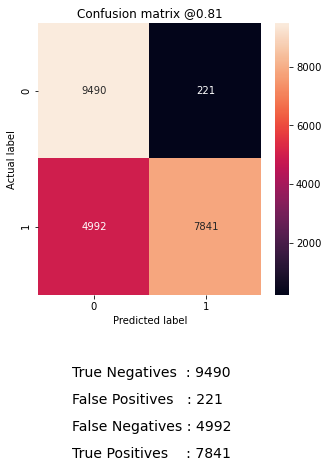

In [13]:
plot_cm(test_Y, test_predictions)

In [12]:
print(classification_report(test_Y, test_predictions))


              precision    recall  f1-score   support

           0       0.66      0.98      0.78      9711
           1       0.97      0.61      0.75     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.77     22544
weighted avg       0.84      0.77      0.77     22544



In [13]:
knn_classifier.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [50]:
n_neighbors = list(range(1,50,2))
p=[1,2]

param_grid = [
    {'n_neighbors' : n_neighbors,
     'p' :p,
     'weights':['distance','uniform']
    },
]

optimal_params = GridSearchCV(
    estimator = knn_classifier,
    param_grid = param_grid,
    cv=2,
    scoring ='accuracy',
    verbose = 2
)

optimal_params.fit(train_X,train_Y)
print(optimal_params.best_params_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] n_neighbors=1, p=1, weights=distance ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. n_neighbors=1, p=1, weights=distance, total= 1.1min
[CV] n_neighbors=1, p=1, weights=distance ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ............. n_neighbors=1, p=1, weights=distance, total= 1.0min
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] .............. n_neighbors=1, p=1, weights=uniform, total= 1.1min
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] .............. n_neighbors=1, p=1, weights=uniform, total= 1.0min
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV] ............. n_neighbors=1, p=2, weights=distance, total= 1.2min
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV] ............. n_neighbors=1, p=2, weights=distance, total= 1.0min
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] .............. n_neighbors=1, p=2, weights=uniform, total= 1.2min
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] .............. n_neighbors=1, p=2, weights=uniform, total= 1.0min
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=15, p=1, weights=uniform, total= 1.3min
[CV] n_neighbors=15, p=2, weights=distance ...........................
[CV] ............ n_neighbors=15, p=2, weights=distance, total= 1.4min
[CV] n_neighbors=15, p=2, weights=distance ...........................
[CV] ............ n_neighbors=15, p=2, weights=distance, total= 1.3min
[CV] n_neighbors=15, p=2, weights=uniform ............................
[CV] ............. n_neighbors=15, p=2, weights=uniform, total= 1.4min
[CV] n_neighbors=15, p=2, weights=uniform ............................
[CV] ............. n_neighbors=15, p=2, weights=uniform, total= 1.3min
[CV] n_neighbors=17, p=1, weights=distance ...........................
[CV] ............ n_neighbors=17, p=1, weights=distance, total= 1.5min
[CV] n_neighbors=17, p=1, weights=distance ...........................
[CV] ............ n_neighbors=17, p=1, weights=distance, total= 1.3min
[CV] n_neighbors=17, p=1, weights=uniform ............................
[CV] .

[CV] ............ n_neighbors=29, p=2, weights=distance, total= 1.3min
[CV] n_neighbors=29, p=2, weights=uniform ............................
[CV] ............. n_neighbors=29, p=2, weights=uniform, total= 1.6min
[CV] n_neighbors=29, p=2, weights=uniform ............................
[CV] ............. n_neighbors=29, p=2, weights=uniform, total= 1.4min
[CV] n_neighbors=31, p=1, weights=distance ...........................
[CV] ............ n_neighbors=31, p=1, weights=distance, total= 1.6min
[CV] n_neighbors=31, p=1, weights=distance ...........................
[CV] ............ n_neighbors=31, p=1, weights=distance, total= 1.4min
[CV] n_neighbors=31, p=1, weights=uniform ............................
[CV] ............. n_neighbors=31, p=1, weights=uniform, total= 1.6min
[CV] n_neighbors=31, p=1, weights=uniform ............................
[CV] ............. n_neighbors=31, p=1, weights=uniform, total= 1.5min
[CV] n_neighbors=31, p=2, weights=distance ...........................
[CV] .

[CV] ............. n_neighbors=43, p=2, weights=uniform, total= 1.4min
[CV] n_neighbors=45, p=1, weights=distance ...........................
[CV] ............ n_neighbors=45, p=1, weights=distance, total= 1.6min
[CV] n_neighbors=45, p=1, weights=distance ...........................
[CV] ............ n_neighbors=45, p=1, weights=distance, total= 1.5min
[CV] n_neighbors=45, p=1, weights=uniform ............................
[CV] ............. n_neighbors=45, p=1, weights=uniform, total= 1.7min
[CV] n_neighbors=45, p=1, weights=uniform ............................
[CV] ............. n_neighbors=45, p=1, weights=uniform, total= 1.5min
[CV] n_neighbors=45, p=2, weights=distance ...........................
[CV] ............ n_neighbors=45, p=2, weights=distance, total= 1.6min
[CV] n_neighbors=45, p=2, weights=distance ...........................
[CV] ............ n_neighbors=45, p=2, weights=distance, total= 1.4min
[CV] n_neighbors=45, p=2, weights=uniform ............................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 288.1min finished


{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}


In [14]:
def plot_decision_boundary(X, y, classifier_name):
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#2721d1'])

    h = 0.02
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier_name.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 10))
    plt.pcolormesh(xx, yy,Z,cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=cmap_bold)
    #plt.imshow(Z, interpolation='nearest', cmap=cmap_bold, alpha=0.15, extent=(x_min, x_max, y_min, y_max), origin='lower')
    plt.title("{} neighbor(s)".format(6))
    
    patch0 = mpatches.Patch(color='#FFFF00', label='Normal')
    patch1 = mpatches.Patch(color='#000000', label='Anomaly')
    plt.legend(handles=[patch0, patch1])
    #plt.title(plot_type + '\n' + str(classifier_name).split('(')[0]+ ' Test Accuracy: ' + str(np.round(classifier_name.score(X, y), 5)))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()
     

#plt.set_cmap(plt.cm.Paired)
#plt.pcolormesh(xx, yy,Z,cmap=cmap_light)
    
    

In [15]:
import matplotlib.patches as mpatches

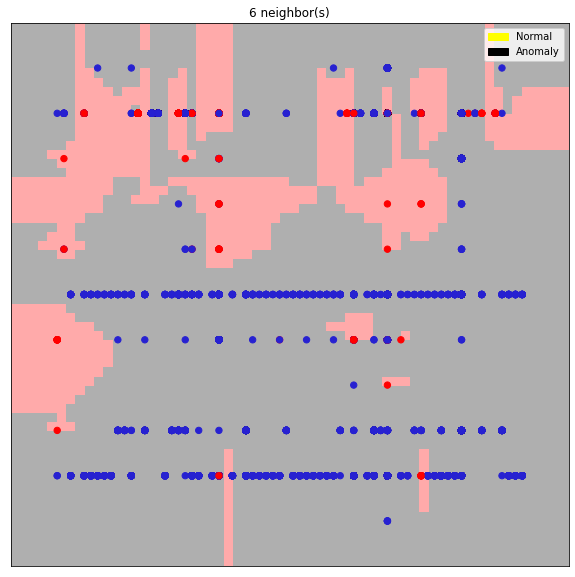

In [16]:
X =test_X[:,2:4]

knn = neighbors.KNeighborsClassifier(n_neighbors = 6, p = 1, weights ='distance').fit(X, test_Y)
plot_decision_boundary(X, test_Y, knn)

In [17]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(test_X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principal_Y = pd.DataFrame(test_Y)

ValueError: array must not contain infs or NaNs

In [ ]:
X = principalDf.values
y = principal_Y.values

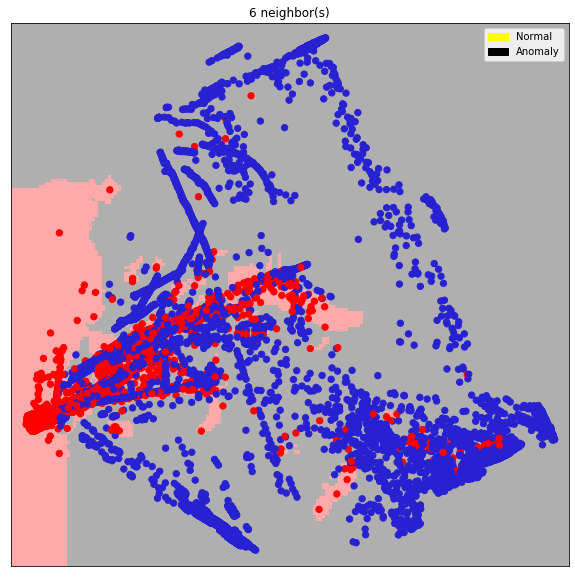

In [48]:
plot_decision_boundary(X, y, knn)

In [50]:
pca = PCA(n_components=2)
principalComponents_test = pca.fit_transform(test_X)
principal_test = pd.DataFrame(data = principalComponents_test, columns = ['PCT1', 'PCT2'])

In [51]:
train_acc = knn.score(principalDf,y)
#cv_acc = pipe.score(val_X,val_Y)
test_predictions = knn.predict(principal_test)

print('Train Accuracy = '+str(train_acc * 100)+' %')
#print('Cross Validation Accuracy = '+str(cv_acc * 100)+' %')
print('Accuracy Test : '+ str(accuracy_score(test_Y, test_predictions)*100)+' %')

Train Accuracy = 99.76046841731726 %
Accuracy Test : 99.48988644428673 %


## PCA for Dimensionaly Reduction 

PCA is used to visualize the dataset by reducing it's dimension into two. 

In [18]:
pca = PCA()
X_train = pca.fit_transform(train_X)
X_test = pca.transform(test_X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[4.89891551e-01 2.11237635e-01 6.55898138e-02 5.46109642e-02
 4.58589906e-02 2.09154502e-02 1.92088082e-02 1.72834555e-02
 1.59865411e-02 1.20735776e-02 9.84318924e-03 8.26538013e-03
 4.83549609e-03 4.21291276e-03 3.33441197e-03 2.85944438e-03
 2.38763033e-03 2.13428853e-03 1.98168949e-03 1.66959631e-03
 1.27072455e-03 1.24130277e-03 1.01855915e-03 6.05179334e-04
 5.72741342e-04 4.44102268e-04 2.45064385e-04 1.11649699e-04
 7.44623576e-05 7.04289384e-05 4.70181160e-05 4.36067175e-05
 3.15047301e-05 2.65164447e-05 6.94264752e-06 5.61853050e-06
 3.74891111e-06 2.23071910e-09]


In [19]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principal_Y = pd.DataFrame(train_Y)
principal_Y ['class'] = principal_Y ['class'].map( {0:'normal', 1:'anomaly'} )
finalDf = pd.concat([principalDf, principal_Y], axis = 1)

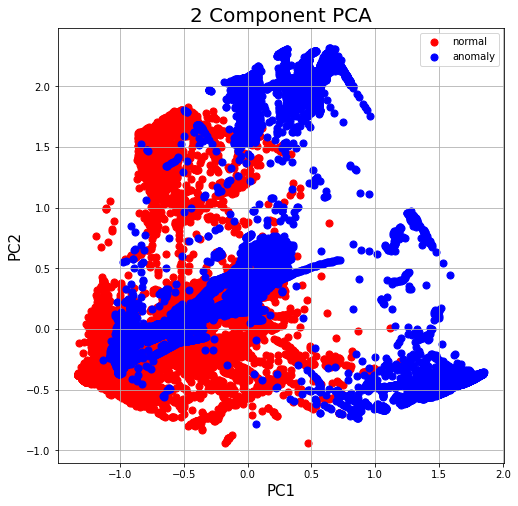

In [20]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['normal', 'anomaly']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
                  finalDf.loc[indicesToKeep, 'PC2'],  
                  c = color, 
                  s = 50)
ax.legend(targets)
ax.grid()

In [38]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50,2)

training_scores, test_scores = validation_curve(knn_classifier,train_X,train_Y, 
                          param_name = 'n_neighbors',
                          param_range=param_range,
                          cv = 2,
                          scoring = 'f1_weighted',
                          verbose=2)
train_score = np.mean(training_scores, axis=1)
test_score = np.mean(test_scores, axis=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total= 1.5min
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[CV] .................................... n_neighbors=3, total= 1.9min
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total= 2.0min
[CV] n_neighbors=7 ...................................................
[CV] .................................... n_neighbors=7, total= 2.0min
[CV] n_neighbors=9 ...................................................
[CV] .................................... n_neighbors=9, total= 2.1min
[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total= 2.2min
[CV] n_neighbors=13 ..................................................
[CV] ................................... n_neighbors=13, total= 2.2min
[CV] n_neighbors=15 ..................................................
[CV] ................................... n_neighbors=15, total= 2.2min
[CV] n_neighbors=17 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 161.0min finished


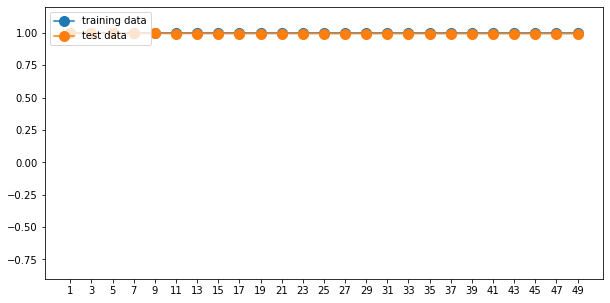

In [45]:
plt.figure(figsize=(10,5))
plt.plot(param_range, train_score, '-o' , label='training data', markersize=10)
plt.plot(param_range, test_score, '-o' , label='test data', markersize=10)
plt.ylim(-0.9001,1.2001)
plt.xticks(param_range)
plt.legend(loc=2)

In [42]:
i = 0
dict = {}
for neighbor, score in zip(param_range,zip(train_score,test_score)):
    dict[i] = {'n_neighbor': neighbor, 
            'train_score': score[0],
            'test_score':score[1]}
    i += 1

val_df = pd.DataFrame(dict).T
val_df

,n_neighbor,train_score,test_score
0,1.0,0.999966,0.996247
1,3.0,0.999966,0.996001
2,5.0,0.999966,0.995848
3,7.0,0.999966,0.995687
4,9.0,0.999966,0.995432
5,11.0,0.999966,0.995262
6,13.0,0.999966,0.995169
7,15.0,0.999966,0.995092
8,17.0,0.999966,0.994931
9,19.0,0.999966,0.994821


In [47]:
print('Max. Test Score: ',val_df['test_score'].max())
print('Max. Test Score index: ',val_df['test_score'].idxmax())

Max. Test Score:  0.9962473957690337
Max. Test Score index:  0
